Professor Fang Jin

Jiaming Zhang

Stat 1129

03/21/2022

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random

Question 1:

Read the file number.txt

Counting the frequencies of the numbers using the dictionary in Python
- Find the frequency of each distinct element using a dictionary.
- Plot the frequency results, e.g. using histogram
- Store this dictionary results into json file and store it in your local computer.

In [3]:
#open file
file = open("/Users/zhangjiaming/Downloads/numbers.txt", "r")

#read and convert file
read_file = file.read()
edit_file = read_file.replace("\n", ",")
edit_file = edit_file.split(',')
edit_file = [int(num) for num in edit_file]
edit_file.sort()

#count each unique number
count = {}
for num in edit_file:
    if num in count:
        count[num] += 1
    else:
        count[num] = 1

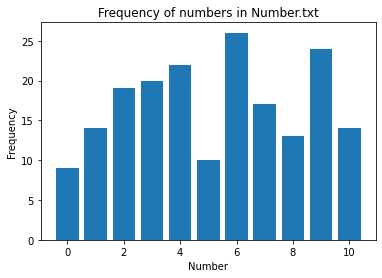

In [4]:
#viasualize data
plt.bar(count.keys(), count.values())
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Frequency of numbers in Number.txt")
plt.show()

In [5]:
print(count)
print("0 occurs 9 times, 1 occurs 14 times...")
print("Visualization of this data is shown above.")

{0: 9, 1: 14, 2: 19, 3: 20, 4: 22, 5: 10, 6: 26, 7: 17, 8: 13, 9: 24, 10: 14}
0 occurs 9 times, 1 occurs 14 times...
Visualization of this data is shown above.


In [6]:
#convert the dictionary into json file and store in local
with open("/Users/zhangjiaming/Downloads/number.json", "w") as outfile:
    json.dump(count, outfile)

Question 2

Choose one from the following questions. 


Requirement:
1. You should have some statistical analysis, including monthly summary, average, median, max, min, and standard deviation.
2. Your visualization should have a pie chart, a bar chart, and multiple line comparisons. For example, you can compare different categories.

Choice 3: If you don’t have an Amazon nor Facebook account, you can work on the Netflix data, using the sample data they provided (a small sample from my own data available for download here) https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/ or download any open source data to read file, load and format, do analysis and plotting.

In [7]:
#import data
df = pd.read_csv("ViewingActivity.csv")
#drop extra information
df = df.drop(["Profile Name", "Attributes", "Supplemental Video Type", "Latest Bookmark", "Bookmark"], axis = 1)
#convert object to datetime
df["Start Time"] = pd.to_datetime(df["Start Time"], utc=True)
#convert from UTC to US Eastern
df["Start Time"] = df["Start Time"].dt.tz_convert("US/Eastern")
#add new date and time column
df.insert(0, "Date", df["Start Time"].dt.date)
df.insert(1, "Time", df["Start Time"].dt.time)
#convert object to time
df["Duration"] = pd.to_timedelta(df["Duration"])
#filter out short duration watch time
df = df[(df["Duration"] > "0 days 00:03:00")]
df = df.reset_index()
df = df.drop(["index"], axis = 1)

In [8]:
#overview of netflix account

#general information
total_episode_played = df.shape[0]
total_watch_time = df["Duration"].sum()

#edit data to provide summary statistics
begin_date = df.iloc[-1,0]
end_date = df.iloc[0,0]
time_period = str(end_date - begin_date).split(",")[0]
#time_period = time_period[0]

#compile Duration_perDay
overview = df.groupby(["Date"])["Duration"].sum().to_frame()
overview.rename(columns = {'Duration': 'Duration_perDay'}, inplace = True)
overview["Duration_perDay_inSeconds"] = overview["Duration_perDay"].dt.total_seconds()
overview = overview.reset_index()

#compile Duration_perMonth
overview["Year"] = pd.DatetimeIndex(overview["Date"]).year.astype(str)
overview["Month"] = pd.DatetimeIndex(overview["Date"]).month.astype(str)
overview["Year_Month"] = overview.Year.str.cat(overview.Month, sep="-")
monthly_overview = pd.DataFrame()
monthly_overview["Year_Month"] = overview.Year.str.cat(overview.Month, sep="-")
monthly_overview = overview.groupby(["Year_Month"])["Duration_perDay_inSeconds"].sum().to_frame()
monthly_overview.rename(columns = {'Duration_perDay_inSeconds': 'Duration_perMonth_inSeconds'}, inplace = True)
monthly_overview = monthly_overview.reset_index()
monthly_overview["Monthly_Time_Spend"] = pd.to_datetime(monthly_overview['Duration_perMonth_inSeconds'], unit='s')
monthly_overview["Monthly_Time_Spend"] = monthly_overview["Monthly_Time_Spend"].apply(lambda d : d.time())

#compile summary statistics
monthly_mean_seconds = int(monthly_overview["Duration_perMonth_inSeconds"].mean())
monthly_median_seconds = int(monthly_overview["Duration_perMonth_inSeconds"].median())
monthly_std_seconds = int(monthly_overview["Duration_perMonth_inSeconds"].std())
monthly_min_seconds = monthly_overview["Duration_perMonth_inSeconds"].min()
monthly_max_seconds = monthly_overview["Duration_perMonth_inSeconds"].max()
monthly_mean = str(datetime.timedelta(seconds=monthly_mean_seconds))
monthly_median = str(datetime.timedelta(seconds=monthly_median_seconds))
monthly_std = str(datetime.timedelta(seconds=monthly_std_seconds))
monthly_min = str(datetime.timedelta(seconds=monthly_min_seconds))
#monthly_max = str(datetime.timedelta(seconds=monthly_max_seconds))
mm, ss = divmod(monthly_max_seconds, 60)
hh, mm= divmod(mm, 60)
monthly_max = str(int(hh))+":"+str(int(mm))+":"+str(int(ss))

In [9]:
print("Overall Statistics")
print("-------------------------------------------")
print("Total Episode Played:                  ", total_episode_played)
print("Total Time On Netflix:    ", total_watch_time)
print("Begin Date:                     ", begin_date)
print("End Date:                       ", end_date)
print("Time Period:                      ", time_period)
print()
print("Summary Statistics of Monthly Netflix Usage")
print("-------------------------------------------")
print("Mean:                             ", monthly_mean)
print("Standard Deviation:               ", monthly_std)
print("Median:                           ", monthly_median)
print("Minimum:                           ", monthly_min)
print("Maximum:                          ", monthly_max)

Overall Statistics
-------------------------------------------
Total Episode Played:                   576
Total Time On Netflix:     12 days 23:50:22
Begin Date:                      2020-06-14
End Date:                        2022-02-18
Time Period:                       614 days

Summary Statistics of Monthly Netflix Usage
-------------------------------------------
Mean:                              17:19:27
Standard Deviation:                14:24:27
Median:                            11:18:30
Minimum:                            0:33:59
Maximum:                           48:44:46


[]

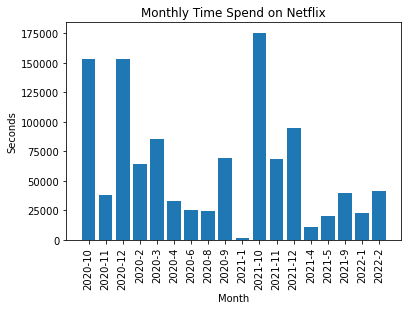

In [10]:
#visualization of monthly time spend on netlix in seconds
plt.bar(monthly_overview["Year_Month"], monthly_overview["Duration_perMonth_inSeconds"])
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Seconds")
plt.title("Monthly Time Spend on Netflix")
plt.plot()

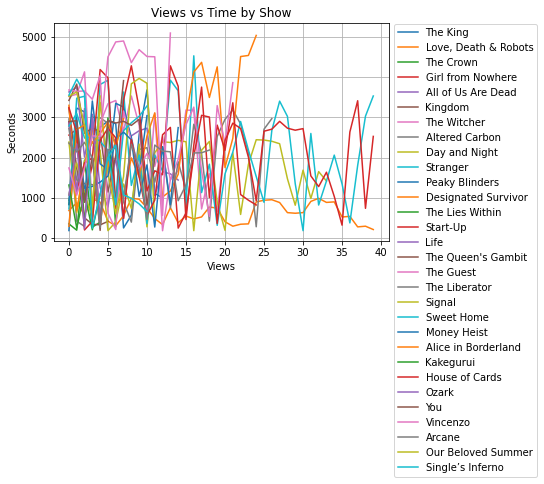

In [11]:
#filter unnecessary column
by_shows = df.drop(["Device Type", "Country", "Date", "Time","Start Time"], axis=1)

#extract show name from Title
show_name = list()
for j in range(len(by_shows)):
    temp = str(by_shows["Title"][j])
    show_name.append(temp.split(":")[0])
by_shows["Show Name"] = show_name
by_shows = by_shows.drop(["Title"], axis=1)

#reverse the order, so the it aligns with time progression
by_shows = by_shows.iloc[::-1]

#calculate duration into seconds
by_shows["Time"] = by_shows["Duration"].dt.total_seconds()
by_shows = by_shows.drop(["Duration"], axis=1)

#count view number by shows
show_freq = {}
for k in range(len(by_shows)):
    name = str(by_shows["Show Name"].iloc[k])
    if name in show_freq: 
        show_freq[name] += 1
    else:
        show_freq[name] = 1
        
#compile table by show for graphing
show_time = {}
for h in range(len(by_shows)):
    name = str(by_shows["Show Name"].iloc[h])
    time = int(by_shows["Time"].iloc[h])
    if name in show_time: 
        show_time[name].append(time)
    else:
        show_time[name] = [time]
df_show = pd.DataFrame.from_dict(show_time, orient='index').T.reset_index()

#drop unkown data
df_show = df_show.drop(["NullCompleteVideo"], axis=1)

#rename index to n
df_show.rename(columns = {"index":"n"}, inplace = True)
df_show["n"] = df_show["n"].astype(float)

#drop movies
for g in show_freq:
    if show_freq[g] < 3:
        df_show = df_show.drop([g], axis=1)

#trim n to be 40 for better visualization
df_show.drop(df.index[40:91], inplace=True)

#Visualization
df_show.plot(x="n")
plt.xlabel("Views")
plt.ylabel("Seconds")
plt.title("Views vs Time by Show")
plt.legend(bbox_to_anchor=(1.0,1.02))
plt.grid()
plt.show()

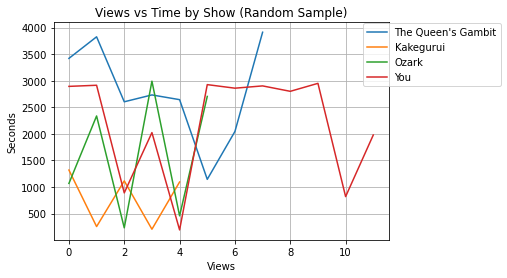

In [12]:
#randomly choose 5 shows
df_show_1 = df_show
drop = []
temp = len(df_show_1.columns)
while len(drop) < temp-5:
    num = random.randint(1, len(df_show_1.columns))
    if num < len(df_show_1.columns):
        df_show_1.drop(df_show_1.columns[num], axis=1, inplace=True)
        drop.append(num)

#Visualization
df_show_1.plot(x="n")
plt.xlabel("Views")
plt.ylabel("Seconds")
plt.title("Views vs Time by Show (Random Sample)")
plt.legend(bbox_to_anchor=(1.35,1.02))
plt.grid()
plt.show()

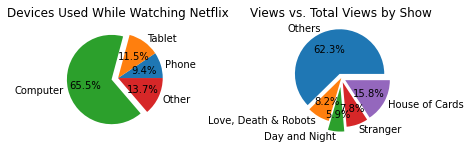

Total: 576


In [13]:
#compile devices used when watching Netflix

#organize the dataframe
temp = df.groupby(["Device Type"]).count()
temp = temp["Date"].to_frame()
temp.rename(columns = {'Date': 'Count'}, inplace = True)
temp = temp.reset_index()

#combine same type of devices
device_type = pd.DataFrame({"Device Type":["Phone","Tablet","Computer","Other"], "Count":[0,0,0,0]})
for i in range(len(temp)):
    if "iPhone" in temp["Device Type"][i]:
        device_type.at[0, "Count"] += temp["Count"][i]
    elif "iPad" in temp["Device Type"][i]:
        device_type.at[1, "Count"] += temp["Count"][i]
    elif "Cadmium" in temp["Device Type"][i]:
        device_type.at[2, "Count"] += temp["Count"][i]
    else:
        device_type.at[3, "Count"] += temp["Count"][i]
        
#compile percentage of show pie graph
test_value = total_episode_played * 0.05
pie_freq = {}
for m in show_freq:
    if show_freq[m] < test_value:
        if "Others" in pie_freq:
            pie_freq["Others"] += show_freq[m]
        else:
            pie_freq["Others"] = show_freq[m]
    else:
        pie_freq[m] = show_freq[m]

pie_show = pd.DataFrame.from_dict(pie_freq, orient="index").reset_index()
pie_show.rename(columns = {"index":"Name"}, inplace = True)
pie_show.columns.values[1] = "freq"


#visualization
plt.subplot(1,2,1)
plt.pie(device_type["Count"], labels=device_type["Device Type"], explode=(0,0,0.15,0), autopct="%1.1f%%")
plt.title("Devices Used While Watching Netflix")

plt.subplot(1,2,2)
plt.pie(pie_show["freq"], labels=pie_show["Name"], explode=(0.1,0,0.2,0.1,0.1), autopct="%1.1f%%")
plt.title("Views vs. Total Views by Show")
plt.subplots_adjust(wspace=1)
plt.show()

print("Total:", total_episode_played)

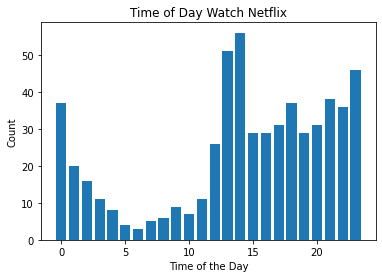

In [53]:
#create a column contain which hour of day the video is been watched
Hour = []
for m in df["Time"]:
    Hour.append(int(str(m)[0:2]))
df["Hour"] = Hour

#group the columns for visualization
time_watch = df.groupby(["Hour"])["Title"].count().reset_index()
time_watch.rename(columns = {"Title":"Count"}, inplace = True)

#visualization
plt.bar("Hour", "Count", data = time_watch)
plt.xlabel("Time of the Day")
plt.ylabel("Count")
plt.title("Time of Day Watch Netflix")
plt.show()